# import libs

In [2]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.14.0'

# Data Processing

## Image augmentation

In [11]:
data_loc_base = "../../data/cnn_cat_vs_dogs"


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    f"{data_loc_base}/training_set",
    target_size=(64,64),
    batch_size= 32,
    class_mode= 'binary'
)

Found 8000 images belonging to 2 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_set = test_datagen.flow_from_directory(
    f"{data_loc_base}/test_set",
    target_size=(64,64),
    batch_size= 32,
    class_mode= 'binary'
)

Found 2000 images belonging to 2 classes.


#  Building the CNN

In [13]:
cnn = tf.keras.models.Sequential()

## Convolution

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

## Pooling

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Another convolution

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

## Another pooling

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Flattening

In [18]:
cnn.add(tf.keras.layers.Flatten())

## Full Connection

In [19]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Output layer

In [20]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Training the CNN

## Compile Model

In [21]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics= [ 
        tf.keras.metrics.Accuracy(), 
        tf.keras.metrics.AUC(), 
        #tf.keras.metrics.PrecisionAtRecall(recall=0.05), 
        #tf.keras.metrics.F1Score()
        ]
)

## Training and validation

In [22]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)
cnn.fit(x = training_set, validation_data = test_set, epochs = 25, callbacks=[callback_es])

Epoch 1/25
250/250 [==============================] - 55s 214ms/step - loss: 0.6726 - accuracy: 0.0000e+00 - auc: 0.6188 - val_loss: 0.6309 - val_accuracy: 0.0000e+00 - val_auc: 0.7038
Epoch 2/25
250/250 [==============================] - 34s 137ms/step - loss: 0.6186 - accuracy: 0.0000e+00 - auc: 0.7176 - val_loss: 0.5998 - val_accuracy: 0.0000e+00 - val_auc: 0.7700
Epoch 3/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5802 - accuracy: 0.0000e+00 - auc: 0.7645 - val_loss: 0.5368 - val_accuracy: 0.0000e+00 - val_auc: 0.8170
Epoch 4/25
250/250 [==============================] - 44s 174ms/step - loss: 0.5502 - accuracy: 0.0000e+00 - auc: 0.7933 - val_loss: 0.5397 - val_accuracy: 0.0000e+00 - val_auc: 0.8265
Epoch 5/25
250/250 [==============================] - 42s 169ms/step - loss: 0.5266 - accuracy: 0.0000e+00 - auc: 0.8141 - val_loss: 0.5116 - val_accuracy: 0.0000e+00 - val_auc: 0.8417
Epoch 6/25
250/250 [==============================] - 40s 162ms/step - loss

# Making Predictions

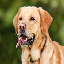

In [24]:
import numpy as np

from keras.preprocessing import image

test_img = image.load_img('../../data/cnn_cat_vs_dogs/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
test_img

## Convert image to array

In [25]:
test_img_array = image.img_to_array(test_img)

## Scale Input Image

In [28]:
test_img_scaled = test_img_array / 255.0

In [30]:
test_img_batch = np.expand_dims(test_img_scaled, axis=0)

In [31]:
result = cnn.predict(test_img_batch)

1/1 [==============================] - 0s 135ms/step


In [33]:
if result[0][0] > 0.5:
    print("This is a DOG")
else:
    print("This is a cat")

This is a DOG


## One more test



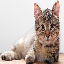

In [34]:
import numpy as np

from keras.preprocessing import image

test_img = image.load_img('../../data/cnn_cat_vs_dogs/single_prediction/cat_or_dog_2.jpg', target_size=(64,64))
test_img

In [37]:
test_img_array = image.img_to_array(test_img)
test_img_scaled = test_img_array / 255.0
test_img_batch = np.expand_dims(test_img_scaled, axis=0)
result = cnn.predict(test_img_batch)

if result[0][0] > 0.5:
    print(f"This is a DOG with probablilty : {result[0][0]}")
else:
    print(f"This is a cat with probablilty : {1 - result[0][0]}")

1/1 [==============================] - 0s 40ms/step
This is a cat with probablilty : 0.9208823293447495
